In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
            
        # Check for convergence
        errors = np.append(errors, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

In [3]:
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = x.copy()
        
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
            
        # Check for convergence
        errors = np.append(errors, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

# Homework 4

In [4]:
A = np.array([[3, -0.1, -0.2],
             [0.1, 7, -0.3],
             [0.3, -0.2, 10]], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)
x0 = np.zeros_like(b, dtype=float)
max_iterations = 100

### Tolerance 10e-3

In [5]:
#Jacobi
tol = 10e-3
solution, iterations, error = jacobi(A, b, x0, tol, max_iterations)
jacobi1_conv = error

print("Tolerance:", tol)
print(f"Solution: {solution}")
print(f"Iterations: {iterations}")

Tolerance: 0.01
Solution: [ 3.0000225  -2.50000266  6.99998104]
Iterations: 3


In [6]:
#Gauss-Seidel
tol = 10e-3
solution, iterations, error = gauss_seidel(A, b, x0, tol, max_iterations)
gauss1_conv = error

print("Tolerance:", tol)
print(f"Solution: {solution}")
print(f"Iterations: {iterations}")

Tolerance: 0.01
Solution: [ 3.0000319  -2.49998799  6.99999928]
Iterations: 2


### Tolerance 10e-6

In [7]:
#Jacobi
tol = 10e-6
solution, iterations, error = jacobi(A, b, x0, tol, max_iterations)
jacobi2_conv = error

print("Tolerance:", tol)
print(f"Solution: {solution}")
print(f"Iterations: {iterations}")

Tolerance: 1e-05
Solution: [ 2.99999991 -2.50000001  7.00000002]
Iterations: 5


In [8]:
#Gauss-Seidel
tol = 10e-6
solution, iterations, error = gauss_seidel(A, b, x0, tol, max_iterations)
gauss2_conv = error

print("Tolerance:", tol)
print(f"Solution: {solution}")
print(f"Iterations: {iterations}")

Tolerance: 1e-05
Solution: [ 3.  -2.5  7. ]
Iterations: 4


### Tolerance 10e-9

In [9]:
#Jacobi
tol = 10e-9
solution, iterations, error = jacobi(A, b, x0, tol, max_iterations)
jacobi3_conv = error

print("Tolerance:", tol)
print(f"Solution: {solution}")
print(f"Iterations: {iterations}")

Tolerance: 1e-08
Solution: [ 3.  -2.5  7. ]
Iterations: 7


In [10]:
#Gauss-Seidel
tol = 10e-9
solution, iterations, error = gauss_seidel(A, b, x0, tol, max_iterations)
gauss3_conv = error

print("Tolerance:", tol)
print(f"Solution: {solution}")
print(f"Iterations: {iterations}")

Tolerance: 1e-08
Solution: [ 3.  -2.5  7. ]
Iterations: 5


## Analysis

### Difference in iterations required (based on tolerance)

Jacobi <br>
10e-3: 3 <br>
10e-6: 5 <br>
10e-9: 7

Gauss-Seidel <br>
10e-3: 2 <br>
10e-6: 4 <br>
10e-9: 5

### Graphs <br>
The errors up to the range of each tolerance level will of course be the same, but showing each graph will help visualize lower values

#### Jacobi

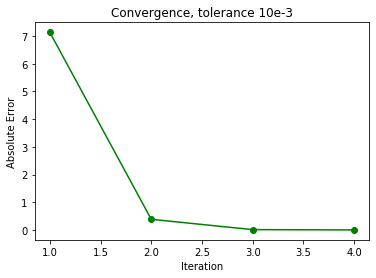

In [11]:
iterations = list(range(0,10))

plt.title("Convergence, tolerance 10e-3")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:5], jacobi1_conv, 'g', marker='o')

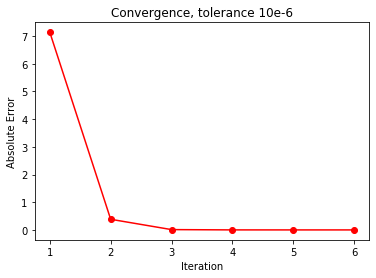

In [12]:
plt.title("Convergence, tolerance 10e-6")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:7], jacobi2_conv, 'r', marker='o')

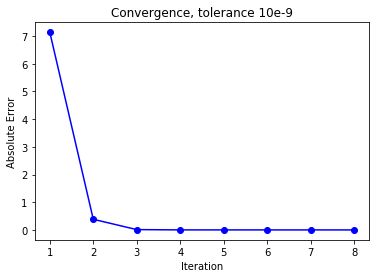

In [13]:
plt.title("Convergence, tolerance 10e-9")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:9], jacobi3_conv, 'b', marker='o')

#### Gauss-Seidel

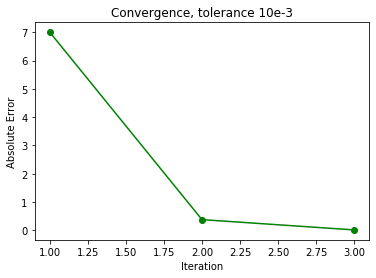

In [14]:
plt.title("Convergence, tolerance 10e-3")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:4], gauss1_conv, 'g', marker='o')

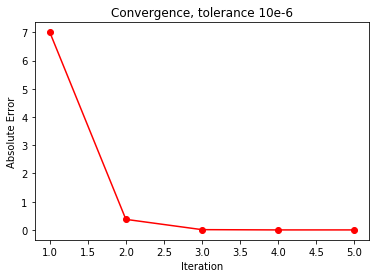

In [15]:
plt.title("Convergence, tolerance 10e-6")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:6], gauss2_conv, 'r', marker='o')

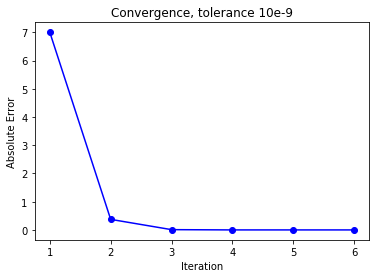

In [16]:
plt.title("Convergence, tolerance 10e-9")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:7], gauss3_conv, 'b', marker='o')

## Discussion

The lower the tolerance is set, the more iterations are needed to converge to a point that satisfies said tolerance. In fact, the relationship between the number of iterations and tolerance is of a logarithmic form.